c:\python\miniconda\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Programmer\AppData\Local\Temp\ipykernel_12620\2588230706.py:26: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-152, azim=-26)
c:\python\miniconda\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Programmer\AppData\Local\Temp\ipykernel_12620\2588230706.py:39: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument au

Text(0.5, 0.5, 'Feature 1')

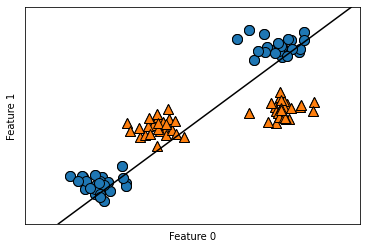

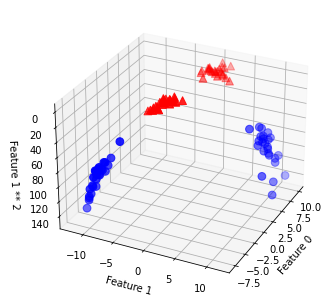

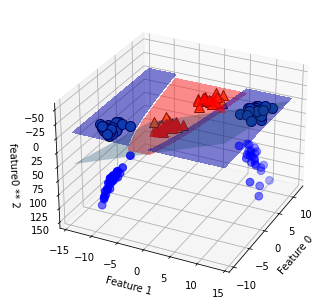

In [2]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D, axes3d
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

linearsvm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linearsvm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

X_new = np.hstack([X, X[:, 1 :]**2])

fig = plt.figure()
# visualize in 3D
ax = Axes3D(fig, elev=-152, azim=-26)
# first plot all points with y == 0 and then y == 1
mask = y == 0
ax.scatter(X_new[mask, 0],X_new[mask, 1],X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0],X_new[~mask, 1],X_new[~mask, 2], c='r', marker="^", cmap=mglearn.cm2, s=60)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")

linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)

xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
 cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
 cmap=mglearn.cm2, s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")

ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
 cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

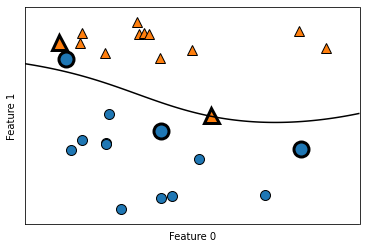

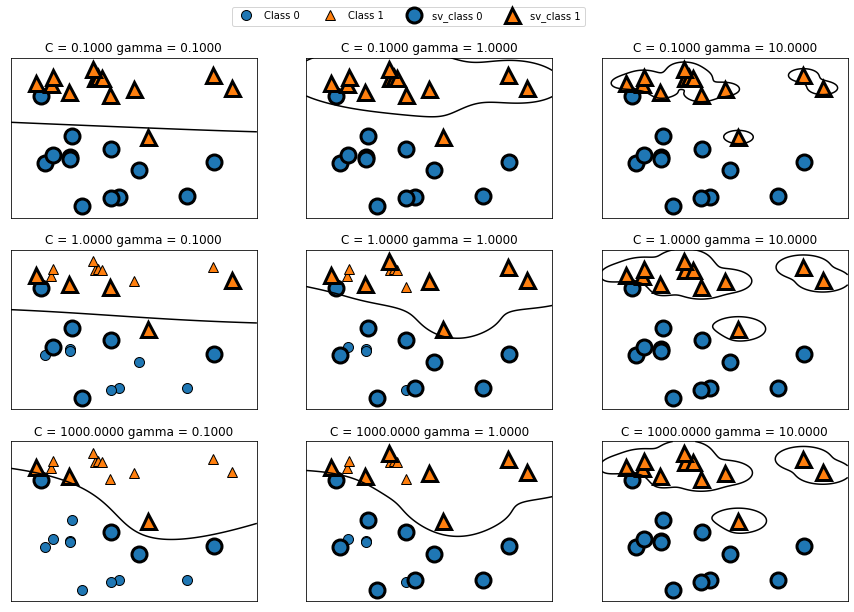

In [8]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()

svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)

mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(["Class 0", "Class 1", "sv_class 0", "sv_class 1"], ncol=4, loc=(0.9, 1.2))

Train set accuracy:0.903755868544601
Test set accuracy:0.9370629370629371
Mininmum for each feature:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Train:0.9835680751173709
Test:0.972027972027972


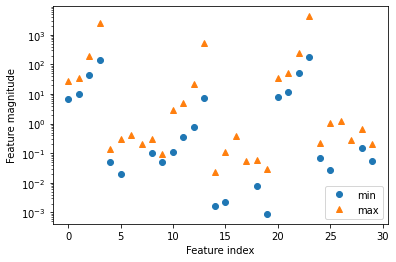

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()

svc.fit(X_train, y_train)

print("Train set accuracy:{}".format(svc.score(X_train, y_train)))
print("Test set accuracy:{}".format(svc.score(X_test, y_test)))

plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

# compute the minimum value per feature in the training set
min_on_training = X_train.min(axis=0)

#compute the range of each feature (min - max) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

#subtract the min and divide by range
# afterward min = 0 and max=1 for each feature

X_train_scaled = (X_train - min_on_training) / range_on_training

print("Mininmum for each feature:{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature:{}".format(X_train_scaled.max(axis=0)))

X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC().fit(X_train_scaled, y_train)
print("Train:{}".format(svc.score(X_train_scaled, y_train)))
print("Test:{}".format(svc.score(X_test_scaled, y_test)))